### 이상치 

- p97쪽

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from matplotlib import rc, rcParams, font_manager 
#!find / -name "*Nanum*.ttf"
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
fontName = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=fontName)

from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

In [ ]:
from sklearn.datasets import load_wine 

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

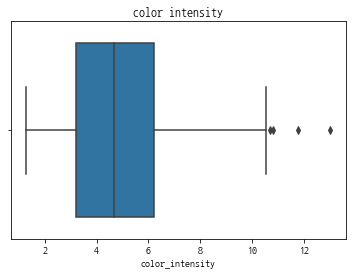

In [5]:
plt.title('color intensity')
sns.boxplot(wine['color_intensity'], whis=1.5);

In [7]:
# 인덱스 리턴 방식 
def outlier_iqr(df, col):
    q1, q3 = np.percentile(df[col], [25,75])
    iqr = q3 - q1 
    lower = q1 - (iqr*1.5)
    upper = q3 + (iqr*1.5)
    outliers = df[(df[col] > upper) | (df[col] < lower)]
    return outliers[[col]]

outliers = outlier_iqr(wine, 'color_intensity')
outliers
# wine.drop(index=outliers.index)  # 삭제 방법

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [12]:
# 아예 제거하는 방식 
def outlier_iqr2(df, col):
    q1, q3 = np.percentile(df[col], [25,75])
    iqr = q3 - q1     
    return df[(df[col] > q1 - iqr*1.5 ) & (df[col] < q3 + iqr*1.5)]

print(len(outlier_iqr2(wine, 'color_intensity')), len(wine))

174 178


---
### 결측치 

- p389쪽

In [34]:
df = pd.read_csv('ADP_book_ver01/data/student_data.csv')

# KNN만 기술 - 수치형만 됨
df_imp = df[df.select_dtypes(exclude='object').columns]
df_imp.isnull().sum()

famrel      1
freetime    2
goout       3
Dalc        4
Walc        2
health      4
absences    3
grade       0
G1          0
G2          0
dtype: int64

In [21]:
from sklearn.impute import KNNImputer 

imputer = KNNImputer(n_neighbors=5)
df_res = pd.DataFrame(imputer.fit_transform(df_imp), columns=df_imp.columns)

df[df_imp.columns] = df_res  # 원본에 덮어쓰기 
df.isnull().sum()

school        0
sex           0
paid          0
activities    0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
grade         0
G1            0
G2            0
dtype: int64

---
### 범주형 그룹화 

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'].unique()

array([0, 1, 2])

In [26]:
iris['Class'].map({0:'Setosa', 1:'Versicolour'}).unique()  # 미지정 nan처리

array(['Setosa', 'Versicolour', nan], dtype=object)

In [27]:
iris['Class'].replace({0:'Setosa', 1:'Versicolour'}).unique()  # 미지정시 원본 데이터 

array(['Setosa', 'Versicolour', 2], dtype=object)

In [32]:
pd.get_dummies(iris['Class'], prefix='Class',drop_first=True).head(2)  

,Class_1,Class_2
0,0,0
1,0,0


In [35]:
df = pd.read_csv('ADP_book_ver01/data/student_data.csv')
df.tail()

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12
394,MS,M,no,no,3.0,2.0,3.0,3.0,3.0,5.0,5.0,9,8,9


In [40]:
# 피봇용 샘플 데이터 생성 
df.groupby(['school', 'sex', 'paid'], as_index=False)['grade'].mean()

,school,sex,paid,grade
0,GP,F,no,10.011494
1,GP,F,yes,10.500000
2,GP,M,no,10.831683
3,GP,M,yes,11.753846
4,MS,F,no,10.384615
5,MS,F,yes,10.583333
6,MS,M,no,9.461538
7,MS,M,yes,11.125000


In [41]:
# 헬프 보기 : pd.pivot_table?
# 헬프 보기 : pd.melt?

In [44]:
pivot_res = df.pivot_table(index=['school', 'paid'], columns='sex', values='grade')
pivot_res

sex                  F          M
school paid                      
GP     no    10.011494  10.831683
       yes   10.500000  11.753846
MS     no    10.384615   9.461538
       yes   10.583333  11.125000

In [48]:
# 멜팅 
pivot_res.reset_index().melt(id_vars=['school', 'paid'], var_name='sex', value_name='grade')

,school,paid,sex,grade
0,GP,no,F,10.011494
1,GP,yes,F,10.500000
2,MS,no,F,10.384615
3,MS,yes,F,10.583333
4,GP,no,M,10.831683
5,GP,yes,M,11.753846
6,MS,no,M,9.461538
7,MS,yes,M,11.125000
